In [1]:
import json
import glob

from itertools import product

import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../urbangrammar_samba/spatial_signatures/ai/gb_32_temporal/json/"

In [3]:
results = glob.glob(path + "*")

In [4]:
r = results[0]

In [5]:
with open(r, "r") as f:
    result = json.load(f)

In [7]:
accuracy = pd.DataFrame(columns=["global"] + result["meta_class_names"], index=pd.Index(["train", "val", "secret"]))

In [8]:
accuracy.loc["train"] = [result["perf_model_accuracy_train"]] + result["perf_within_class_accuracy_train"]
accuracy.loc["val"] = [result["perf_model_accuracy_val"]] + result["perf_within_class_accuracy_val"]
accuracy.loc["secret"] = [result["perf_model_accuracy_secret"]] + result["perf_within_class_accuracy_secret"]

<AxesSubplot:title={'center':'validation'}>

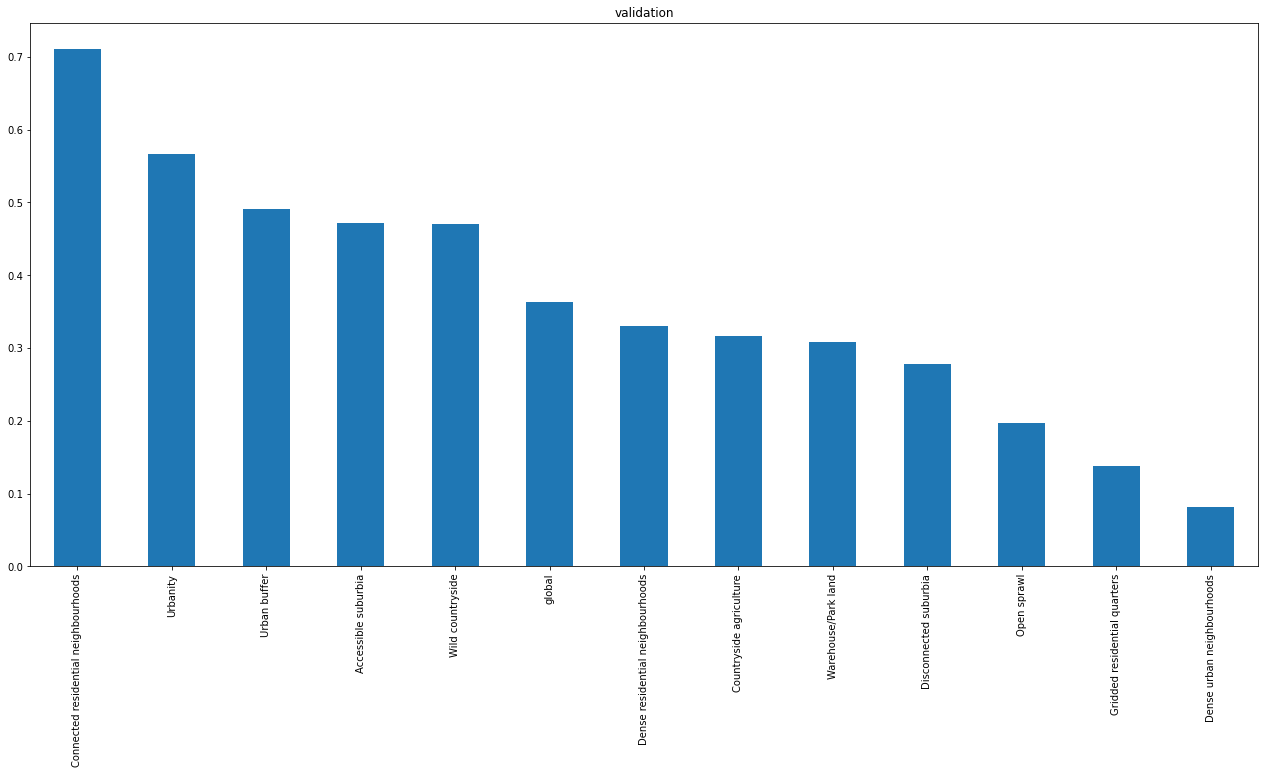

In [9]:
accuracy.loc['val'].sort_values(ascending=False).plot.bar(figsize=(22, 10), title="validation")

In [13]:
a = numpy.array(result['perf_confusion_val'])
a = a / a.sum(axis=1)[:, numpy.newaxis]

In [11]:
# order = numpy.array([0, 3, 1, 2, 7, 4, 8, 5, 6, 11, 9, 10], dtype=int)
# a = pd.DataFrame(a).iloc[order, order].values

([<matplotlib.axis.YTick at 0x7f9ac06168b0>,
 [Text(0, 0, 'Urbanity'),
  Text(0, 1, 'Dense urban neighbourhoods'),
  Text(0, 2, 'Dense residential neighbourhoods'),
  Text(0, 3, 'Connected residential neighbourhoods'),
  Text(0, 4, 'Gridded residential quarters'),
  Text(0, 5, 'Accessible suburbia'),
  Text(0, 6, 'Disconnected suburbia'),
  Text(0, 7, 'Open sprawl'),
  Text(0, 8, 'Warehouse/Park land'),
  Text(0, 9, 'Urban buffer'),
  Text(0, 10, 'Countryside agriculture'),
  Text(0, 11, 'Wild countryside')])

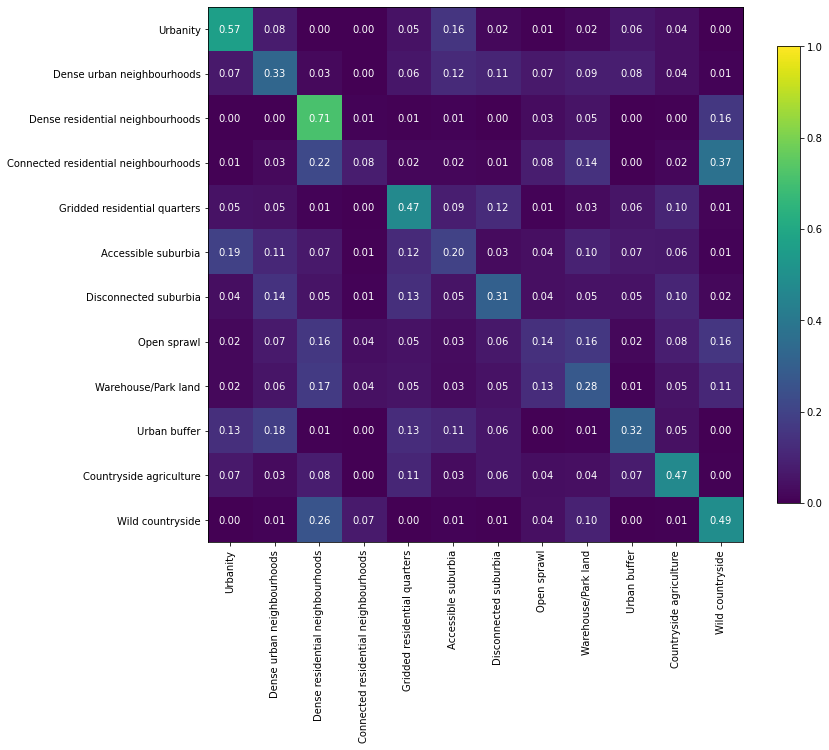

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))


im = plt.imshow(a, cmap="viridis", vmin=0, vmax=1)
for k, j in product(range(12), range(12)):
    plt.text(j, k, "{:.2f}".format(a[k, j]),
                   ha="center", va="center", color="w")
fig.colorbar(im, ax=ax, shrink=.7)
plt.xticks(range(12),numpy.array(result["meta_class_names"])[order], rotation=90)
plt.yticks(range(12),numpy.array(result["meta_class_names"])[order])